<a href="https://colab.research.google.com/github/ksemiu/Classification-and-Trends-BEVs-and-PHEVs-in-Washington-s-Vehicle-Registry/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ydata-profiling


In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz as sv

In [3]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

In [18]:
df = pd.read_csv('/content/df_train.csv')

In [54]:
df_2 = pd.read_csv('/content/df_vol_2.csv')

In [ ]:
df_2

In [ ]:
# Pandas Profiling Report
profile = df.profile_report()
profile.to_file("pandas_profiling_report.html")

# Convert the Pandas Profiling HTML report to PDF using WeasyPrint
!pip install weasyprint
from weasyprint import HTML

HTML("pandas_profiling_report.html").write_pdf("pandas_profiling_report.pdf")

# Download the Pandas Profiling PDF report
from google.colab import files
files.download("pandas_profiling_report.pdf")

In [ ]:
profile

In [ ]:
#Create a DataframeReport
report = sv.analyze(df)

# Save the report to an HTML file
report.show_html("sweetviz_report.html")

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
sweet_report = sv.analyze(df)
sweet_report.show_html("sweetviz_report.html")

# Convert the Sweetviz HTML report to PDF using WeasyPrint
HTML("sweetviz_report.html").write_pdf("sweetviz_report.pdf")

# Download the Sweetviz PDF report
files.download("sweetviz_report.pdf")

Two libraries, Pandas Profiling and Sweetviz, were utilized for conducting in-depth exploratory data analysis (EDA). The EDA processes using these libraries have been incorporated and documented within the GitHub repository, both in HTML and PDF formats.



Addtional Exploraory Analysis for selected features

In [ ]:
df_2
# This is the dataset before encoding.

Univariate analysis of target data; Electric Vehicle Type  

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

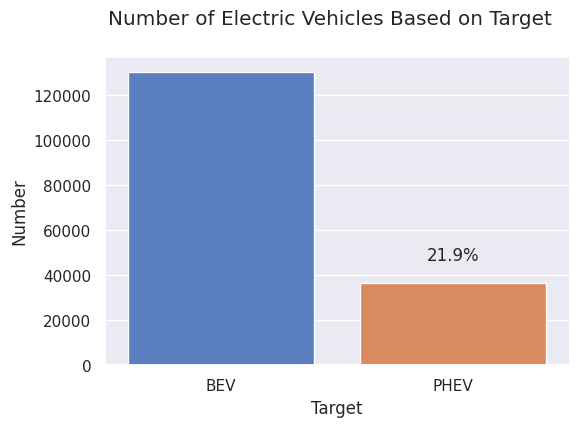

In [28]:
sns.set_theme(style="darkgrid")  # Changing theme to "grey"

chart = 'Number of Electric Vehicles Based on Target'

plt.figure(figsize=(6, 4))
plt.suptitle(f'{chart}', y=1)

# Plotting countplot for the number of electric vehicles based on the target variable
g = sns.countplot(x='Electric Vehicle Type', data=df_2, palette='muted')
g.set(ylabel='Number', xlabel='Target')

# Customize xticks
plt.xticks(fontsize=11)

# Annotate the percentage on the chart
total = len(df_2['Electric Vehicle Type'])
for p in g.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    g.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, height + 0.05 * total),
               ha='center', va='bottom', fontsize=12)

plt.show()


The depicted graph illustrates the distribution of the target variable, revealing that Plug-in Hybrid Electric Vehicles (PHEVs) constitute approximately 21.9% of the total number of electric vehicles. This suggests an imbalance within the dataset concerning the target variable.

Target by City

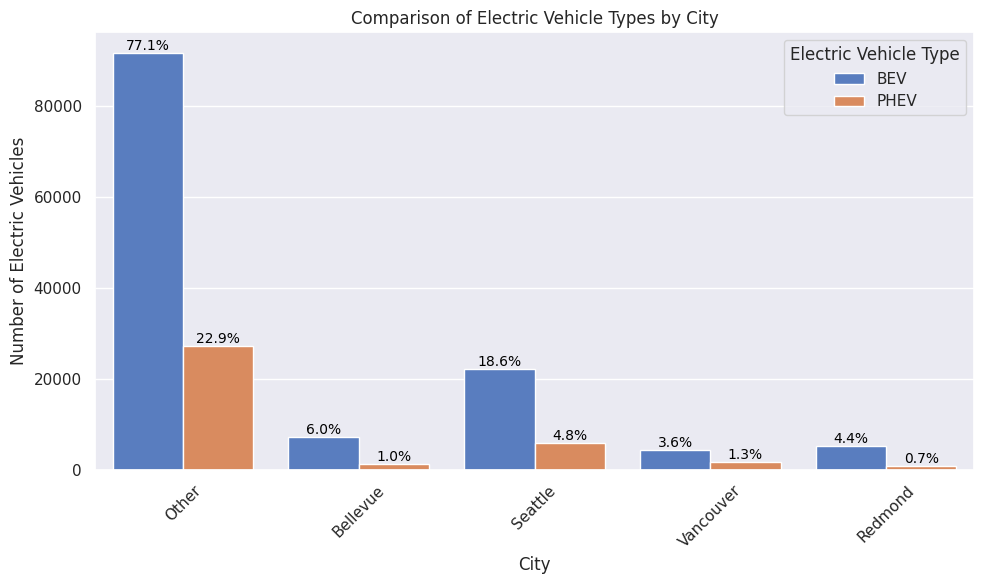

In [51]:
# Calculate the percentage of each category within each city
df_2['Total'] = df_2.groupby('City')['Electric Vehicle Type'].transform('count')
df_2['Percentage'] = (df_2.groupby(['City', 'Electric Vehicle Type'])['Total'].transform('count') / df_2['Total']) * 100

# Create a count plot to compare electric vehicle types by city
plt.figure(figsize=(10, 6))
sns.countplot(x='City', hue='Electric Vehicle Type', data=df_2, palette='muted')

# Annotate bars with percentages
for p in plt.gca().patches:
    percentage = '{:.1f}%'.format(p.get_height() / df_2['Total'].max() * 100)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.text(x, y, percentage, ha='center', va='bottom', fontsize=10, color='black')

plt.title('Comparison of Electric Vehicle Types by City')
plt.xlabel('City')
plt.ylabel('Number of Electric Vehicles')
plt.legend(title='Electric Vehicle Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The graph above shows the distribution of target variables by 'City'. Seattle is the city with the second highest number of electric vehicles at 18% for BEV and around 4.8% PHEV. The rest of the cities fall into the category of cities with the highest number of electric vehicles at 77.1% for BEV and 22.9% for PHEV.

Target by Make


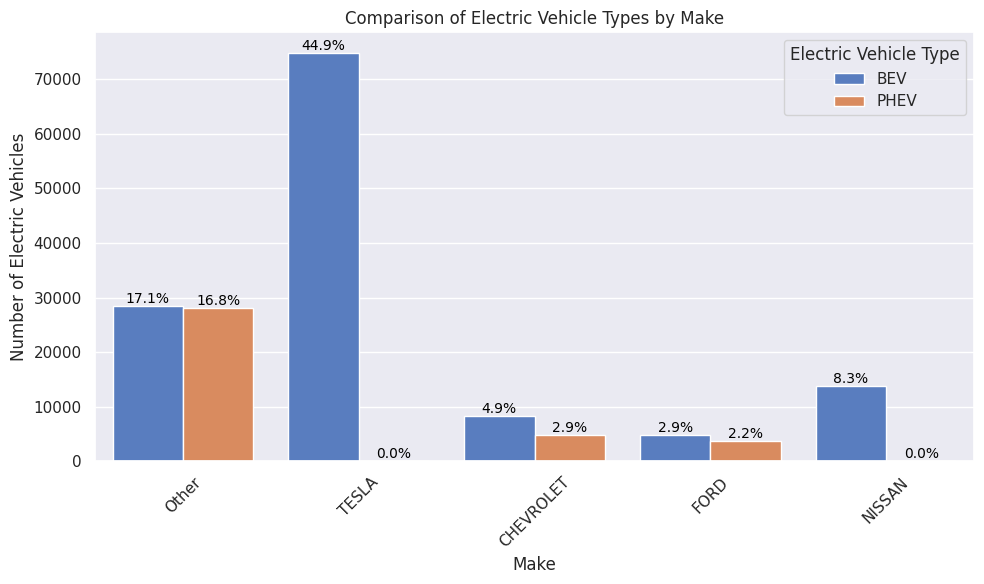

In [59]:
# Calculate the percentage of each electric vehicle type from the whole dataset
total_vehicles = df_2.shape[0]
df_2['Total'] = total_vehicles
df_2['Percentage'] = (df_2.groupby('Electric Vehicle Type')['Total'].transform('count') / total_vehicles) * 100

# Create a count plot to compare electric vehicle types by make
plt.figure(figsize=(10, 6))
sns.countplot(x='Make', hue='Electric Vehicle Type', data=df_2, palette='muted')

# Annotate bars with percentages
for p in plt.gca().patches:
    percentage = '{:.1f}%'.format(p.get_height() / total_vehicles * 100)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.text(x, y, percentage, ha='center', va='bottom', fontsize=10, color='black')

plt.title('Comparison of Electric Vehicle Types by Make')
plt.xlabel('Make')
plt.ylabel('Number of Electric Vehicles')
plt.legend(title='Electric Vehicle Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The graph illustrates the distribution of target variables based on the 'Make' attribute. Tesla electric vehicles dominate with 44.9% representation (including BEV and PHEV), followed by other brands at 30.5% (including BEV and PHEV), NISSAN at 8.3% (including BEV and PHEV), and remaining brands.
